In [55]:
import pandas as pd
cr = pd.read_csv("E:\DATA scientist\R\Creditcard\CreditRisk.csv")

In [56]:
cr.Self_Employed = cr.Self_Employed.fillna( "Yes")
cr.Married.fillna("Yes" , inplace= True)
cr.Gender = cr.Gender.fillna("Male")
cr.Dependents = cr.Dependents.fillna(0)
cr.LoanAmount  = cr.LoanAmount.fillna(  cr.LoanAmount.mean()   )
cr.Loan_Amount_Term  =cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History  = cr.Credit_History.fillna( 0)

In [57]:
cr = cr.drop(["Loan_ID"] , axis = 1)

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
cr[cr.select_dtypes(include = ["object"]).columns] = cr[cr.select_dtypes(include = ["object"]).columns].apply(le.fit_transform)

In [60]:
cr.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [61]:
cr.x = cr.iloc[:,1:-1]
cr.y = cr.iloc[:,-1]

<ipython-input-61-262ef4363961>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cr.x = cr.iloc[:,1:-1]
<ipython-input-61-262ef4363961>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cr.y = cr.iloc[:,-1]


In [69]:
from sklearn.model_selection import train_test_split
cr.x_train, cr.x_test, cr.y_train, cr.y_test = train_test_split(cr.x,cr.y,test_size = 0.2)

In [70]:
lst = []

for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(cr.x_train  , cr.y_train)
    pred_knn = knn.predict(cr.x_test)
    tab_knn = confusion_matrix(pred_knn, cr.y_test)
    acc = tab_knn.diagonal().sum() / tab_knn.sum()
    lst.append(acc)

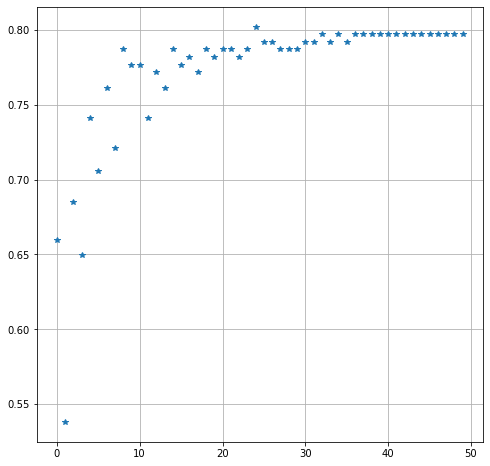

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8 , 8))
plt.plot(lst , "*")
plt.grid()

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=  30)

In [73]:
knn.fit(cr.x_train,cr.y_train)

KNeighborsClassifier(n_neighbors=30)

In [74]:
pred_knn = knn.predict(cr.x_test)

In [75]:
from sklearn.metrics import confusion_matrix
tab_knn  =  confusion_matrix(pred_knn , cr.y_test)
tab_knn

array([[  2,   4],
       [ 38, 153]], dtype=int64)

In [76]:
accuracy_knn = tab_knn.diagonal().sum()*100 / tab_knn.sum()
accuracy_knn

78.68020304568527

In [77]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, cr.x_train , cr.y_train  , cv = 10 )
scores

array([0.72151899, 0.73417722, 0.70886076, 0.70886076, 0.71794872,
       0.70512821, 0.70512821, 0.71794872, 0.71794872, 0.70512821])

In [84]:
import numpy as np
mean_accuracy = np.mean(scores)
mean_accuracy

0.7142648490749757